In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Reyan\Desktop\New folder\EV Cars.csv')

In [3]:
df.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [4]:
df.describe()

,Unnamed: 0,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,51.000000,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,29.877528,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,0.000000,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,25.500000,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,51.000000,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,76.500000,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,102.000000,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


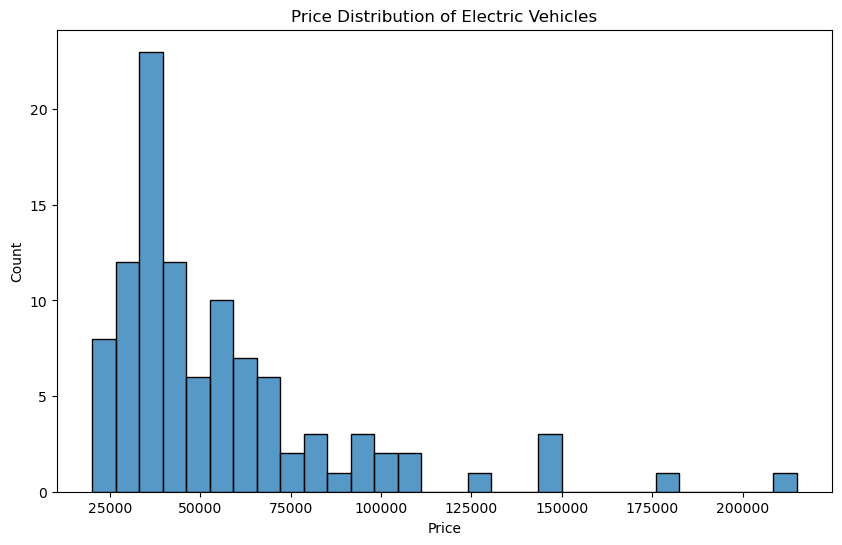

In [11]:
# 1. Price Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PriceEuro', bins=30)
plt.title('Price Distribution of Electric Vehicles')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

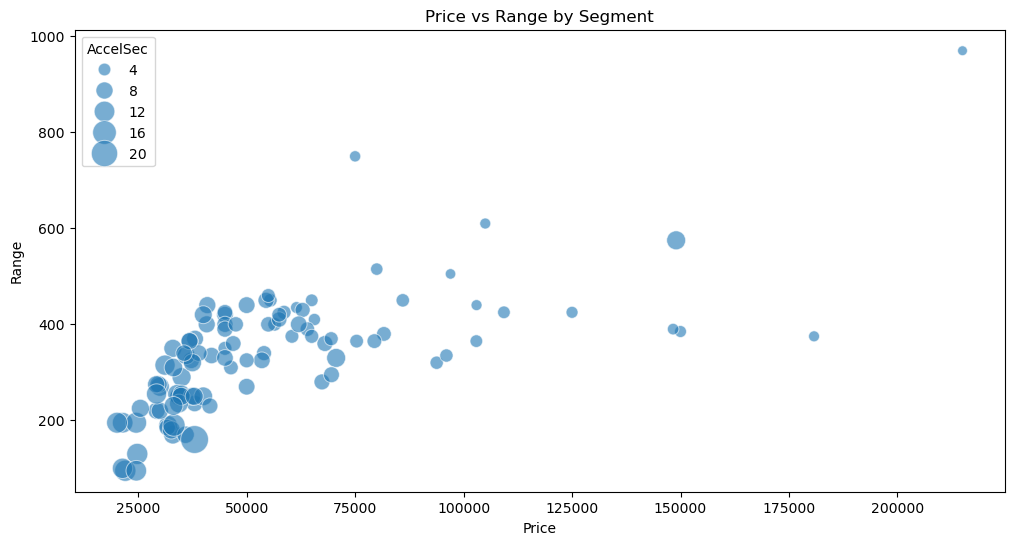

In [23]:
# 2. Price vs Range Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PriceEuro', y='Range_Km', size='AccelSec',
                sizes=(50, 400), alpha=0.6)
plt.title('Price vs Range by Segment')
plt.xlabel('Price')
plt.ylabel('Range')
plt.show()

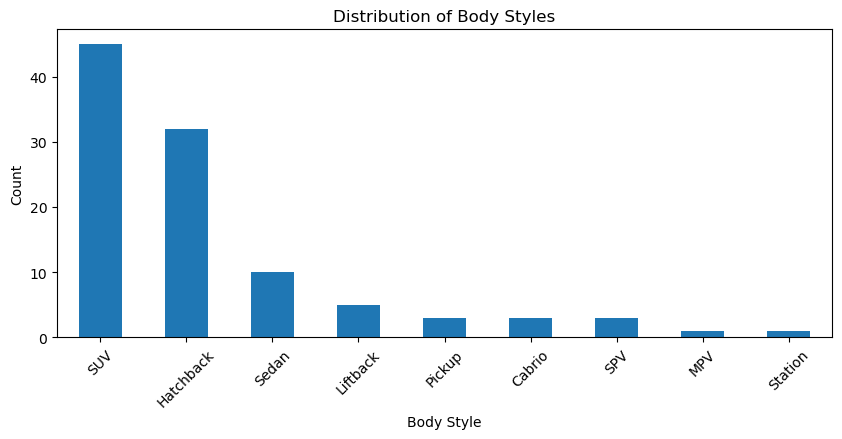

In [14]:
# 3. Body Style Distribution
plt.figure(figsize=(10, 4))
df['BodyStyle'].value_counts().plot(kind='bar')
plt.title('Distribution of Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

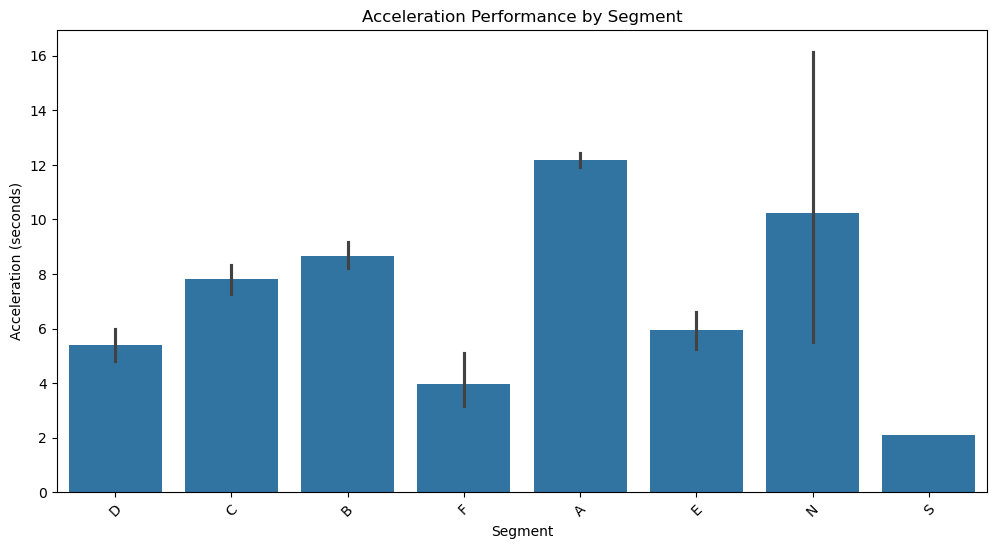

In [18]:
# 4. Performance Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Segment', y='AccelSec')
plt.title('Acceleration Performance by Segment')
plt.xlabel('Segment')
plt.ylabel('Acceleration (seconds)')
plt.xticks(rotation=45)
plt.show()

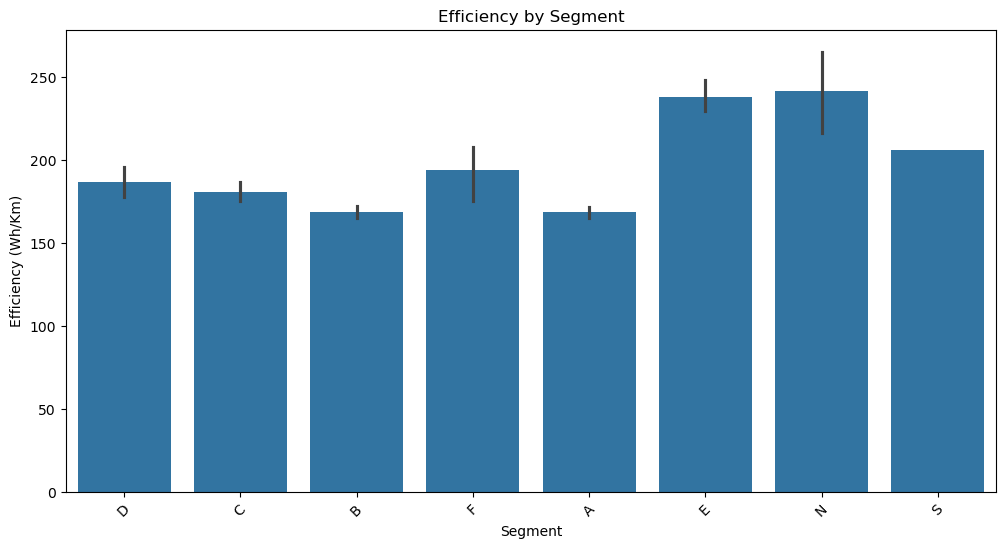

In [35]:
# 6. Efficiency Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Segment', y='Efficiency_WhKm')
plt.title('Efficiency by Segment')
plt.xlabel('Segment')
plt.ylabel('Efficiency (Wh/Km)')
plt.xticks(rotation=45)
plt.show()

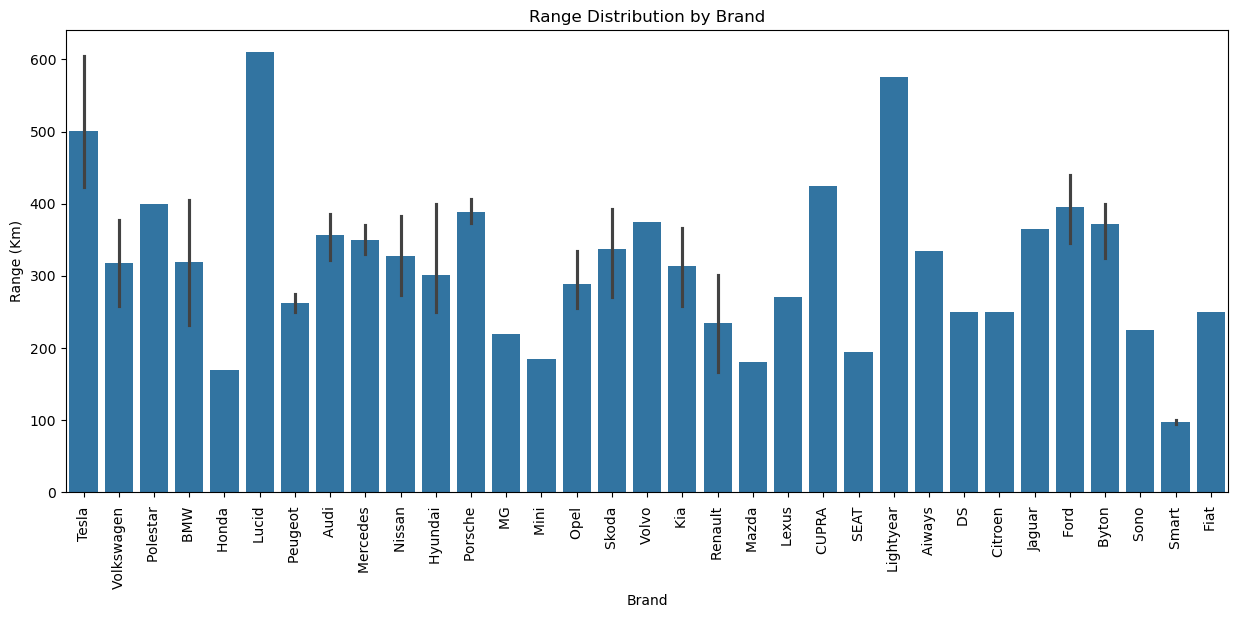

In [36]:
# 10. Range Distribution by Brand
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='Brand', y='Range_Km')
plt.title('Range Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Range (Km)')
plt.xticks(rotation=90)
plt.show()

C:\Users\Reyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Reyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Reyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Reyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

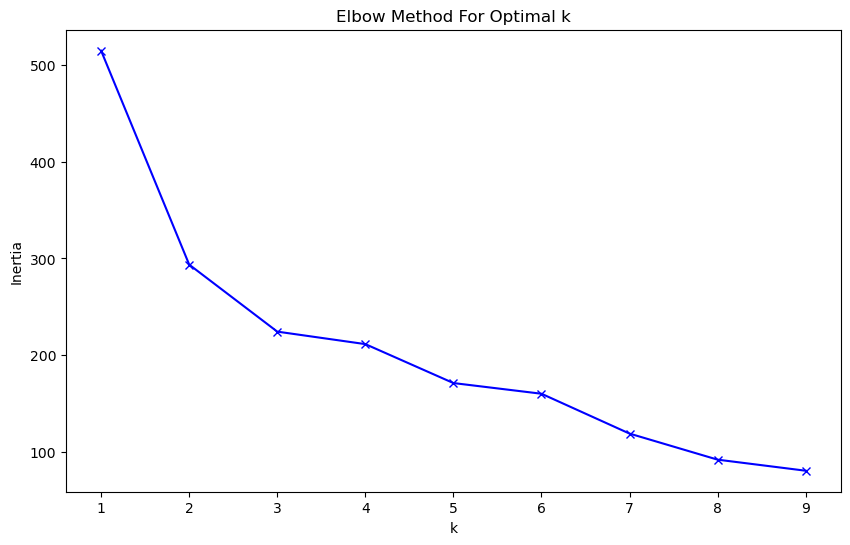

C:\Users\Reyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


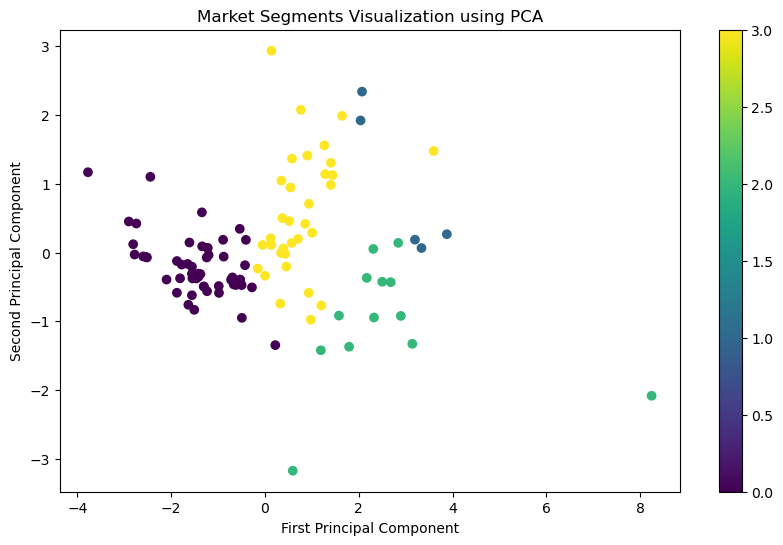

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# 5. Market Segmentation using K-means clustering
features_for_clustering = ['PriceEuro', 'Range_Km', 'AccelSec', 'TopSpeed_KmH', 'Efficiency_WhKm']
X = df[features_for_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Perform clustering with optimal k (let's use k=4 for this example)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Market Segments Visualization using PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

In [33]:
print(df.groupby('Cluster')[features_for_clustering].mean())

             PriceEuro    Range_Km  AccelSec  TopSpeed_KmH  Efficiency_WhKm
Cluster                                                                    
0         33992.326923  258.846154  9.440385    150.653846       171.461538
1        133786.400000  361.000000  3.700000    238.000000       236.600000
2        104214.384615  505.769231  3.984615    253.538462       183.307692
3         59311.242424  395.606061  6.078788    185.969697       212.181818


In [34]:
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster'] == cluster][['Brand', 'Model', 'PriceEuro', 'Range_Km']].head())


Cluster 2:
     Brand                           Model  PriceEuro  Range_Km
0   Tesla    Model 3 Long Range Dual Motor      55480       450
5   Lucid                             Air      105000       610
23   Audi                       e-tron GT      125000       425
24  Tesla   Model 3 Long Range Performance      61480       435
40  Tesla               Model S Long Range      79990       515

Cluster 0:
         Brand                        Model  PriceEuro  Range_Km
1  Volkswagen                     ID.3 Pure      30000       270
4       Honda                            e       32997       170
6  Volkswagen                       e-Golf       31900       190
7     Peugeot                        e-208       29682       275
8       Tesla   Model 3 Standard Range Plus      46380       310

Cluster 3:
        Brand           Model  PriceEuro  Range_Km
2   Polestar                2      56440       400
3        BMW             iX3       68040       360
9       Audi       Q4 e-tron       55